## Legend Wrap

When the legend contains many items, it automatically wraps to prevent overlap - 
up to 15 rows for vertical legends and 5 columns for horizontal ones.


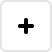
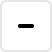
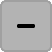
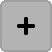
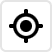
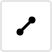
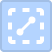
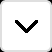
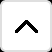
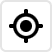
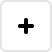
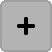
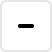
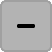
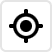
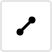
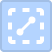
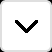
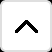
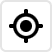

In [1]:
import random
import colorsys
import pandas as pd
from lets_plot import *

LetsPlot.setup_html()

In [2]:
# Prepare a dataset

def distinct_palette(n, s=0.72, l=0.53):
    # Evenly spaced hues in HSL -> hex
    vals = []
    for i in range(n):
        h = i / n
        r, g, b = colorsys.hls_to_rgb(h, l, s)
        vals.append('#{:02X}{:02X}{:02X}'.format(int(r*255), int(g*255), int(b*255)))
    return vals

random.seed(0)
n_cats = 36
pts_per_cat = 13
cats = [f"C{i:02d}" for i in range(1, n_cats + 1)]

rows = []
for i, c in enumerate(cats):
    for _ in range(pts_per_cat):
        x = i % 6 + random.uniform(-0.4, 0.4)
        y = i // 6 + random.uniform(-0.4, 0.4)
        rows.append({"x": x, "y": y, "cat": c})

df = pd.DataFrame(rows)

palette = distinct_palette(n_cats)

In [3]:
base = (
    ggplot(df, aes("x", "y", color="cat")) +
    geom_point(size=3, alpha=0.9) +
    scale_color_discrete(name=f"Categories ({n_cats})") +
    scale_color_manual(values=palette, name=f"Categories ({n_cats})") +
    ggsize(800, 460)
)


In [4]:
# The default legend layout (vertical)
base

In [5]:
# The horizontal case
base + theme(legend_position="bottom")

In [6]:
# You can still adjust the number of legend rows or columns manually.

base + theme(legend_position="bottom") + guides(color=guide_legend(ncol=10, byrow=True))